<a href="https://colab.research.google.com/github/megajoules8/data_science_worksheets/blob/main/Salary_distribution_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Case Study - Monthly Salary Distribution of Taiwanese Employees

## Learning Objectives:
1. Explain basic random sampling concepts
2. Perform Python simulation to perform repeated random sampling
3. Describe large-sample behavior of sampling distributions

<i><b>Background</b></i>: The data source is from Taiwan’s Taxation Bureau, which consists of 5 local branches all over Taiwan. In the tables below, we can have a basic understanding of the monthly salary distribution of full-time Taiwanese employees in 2005. Although the total population in Taiwan is estimated at over 23 million people in 2005, only 5.11 million people’s salary information can be accurately ascertained after considering multiple demographic criteria and checking the accuracy of income records. All of the following statistics in the tables are calculated by the Ministry of Finance, Taiwan, using the income data from the Taxation Bureau.

<img src="Age.jpg" alt="Age Distribution">

Please create a monte carlo code to simulate data, representative of the information from the tables about the population. Obtain a random sample of size 200 and estimate the sample median monthly salary
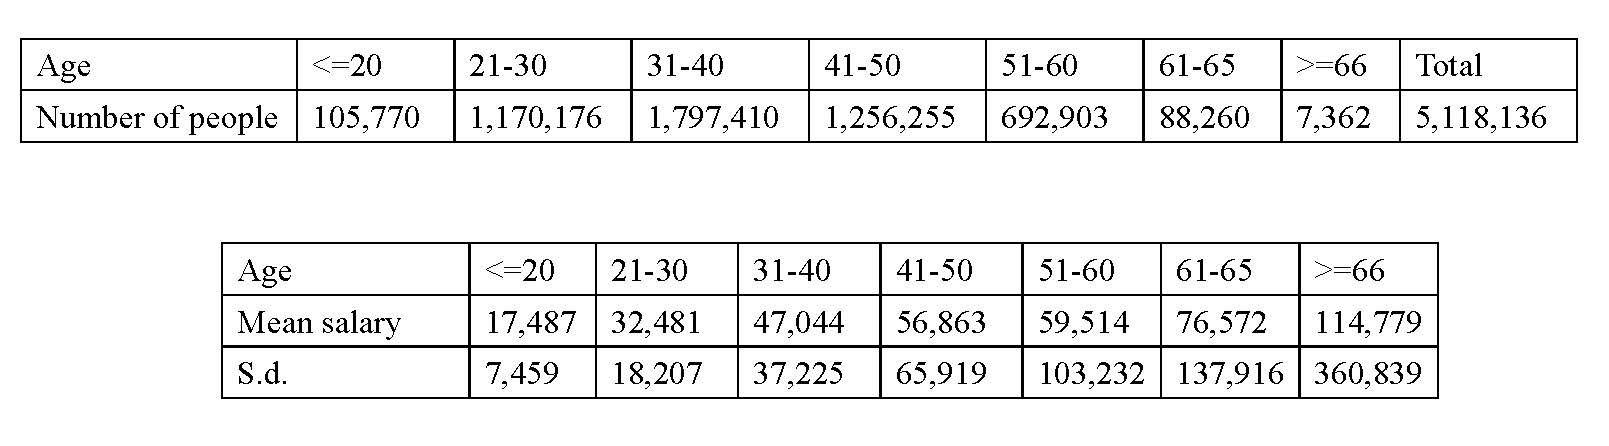

From the above tables, you can assume the population data of salaries of full-time Taiwanese employees are available for us to carry out more detailed analytics.

## Task 1-1

Although the average monthly salary can be an indicator of central tendency to represent the typical earnings of a Taiwanese, it may not be a good indicator sometimes, due to the impact of extreme income levels in the population. Thus, we also want to know a Taiwanese’s median monthly salary to get a full picture of the salary distribution. However, this piece of information is lacking. Please find out the possible estimate of the median monthly salary by using Python simulation utilizing sampling concepts. That is, please use simulation to generate a random sample of size 200 using the population information provided in the above tables. Moreover, we make an explicit distributional assumption on the age-specific salary subpopulations. For example, we assume that for those Taiwanese under 20 years of age, their monthly salary population will be a normal distribution with mean 17,487 and variance $7,459^2$. Similarly, the salary population of Taiwanese with age between 21 and 30 follows another normal distribution with mean 32,481 and variance $18,207^2$. All other age-specific salary subpopulations can be defined accordingly. Please use Python to obtain a random sample of size 200 and estimate the sample median monthly salary.

<i><b>Note 1</b></i>: In your sample, the age-group composition of the sample must be the same (or very close to) the age-group composition of the population. For example, the 21-30 age group constitutes 22.86% (1,170,176/5,118,136) of the population. Hence, in your sample, 46 persons should come from the 21-30 age group.

<i><b>Note 2</b></i>: When you simulate a random value from the specified normal distribution, it is possible that the simulated value is negative. However, the monthly salary must be non-negative. Thus, please take note that your Python code should be able to make sure the simulated value is positive. This restriction can be guaranteed by imposing a conditional check (say, if statement) into the code.

**Solution**

In [ ]:
import numpy as np
from scipy import stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("fivethirtyeight")

In [ ]:
np.random.seed(0) #generates deterministic pseudorandom number sequence
size_samples = 200
num_samples = 5000 #this is for task 2
# in the following cell, set up a function.
#Will be able to call the function with the three requested sample sizes in task 3

In [ ]:
#task one instructions: Define a Python function to handle negative simulated values of a normal distribution

#basically we want to create a monte carlo code
#generate some fake data that has similar properties to data given in table.
#from 200, we want to sample a list of probabilities to output which age category
#a randomly chosen person belongs to
#then want to have a way to generate a salery for a person given their age

#in python, when possible, we want to vectorise: prefer to preform array operations instead of for loops.
#This optomises the speed of the code.
#to this end, I will solve this problem instead by making a data frame in pandas and using numpy random to
#generate the data

#to handle negative numbers, we will use the .clip function of pandas

def posit_norm(num_samples,size_samples):
  list_of_one_row_data_frames= []
  for i in range(num_samples):
    people_data = pd.Series([105770 , 1170176 , 1797410 , 1256255 , 629903 , 88260 , 7362], index=['<=20', '21-30', '31-40', '41-50', '51-60', '61-65', '>=66']) #from table 1: age and population data
    people_data= people_data/people_data.sum() #get the probability for each age category,normalize to make sure this all adds up to 1
    values_sample = np.random.choice(people_data.index, size = size_samples, replace=True, p=people_data.values)

    df = pd.DataFrame(
    {"number of individuals" :  pd.Series(values_sample).value_counts(),
    "mean" : [17487 , 32481 , 47044 , 56863 , 59514 , 76572 , 114779],
    "sd" : [7459 , 18207 , 37225 , 65919 , 103232 , 137916 , 360839]},
    index = ['<=20', '21-30', '31-40', '41-50', '51-60', '61-65', '>=66'])

    df.fillna(0) #make code resiliant in case you change the random seed
    #for >65 age group, sometimes get no results
    #when I printed the output of this part of the code,
    #I got reasonable numbers that seem representative of the population.
    #For example, the 21-30 category often comes up with 46 individuals,
    #and always is within a reasonable range around that number

    #generate normally distrubuted things
    salary = np.random.normal(loc=0, scale=1, size=size_samples) #creating scaleable normal dist of the ages
    longform = pd.DataFrame(values_sample, columns= ['age'])

    #merge the tables
    population_sample_data = pd.merge(left = longform, right =df , how ='left' , left_on= 'age', right_index=True , validate = 'm:1' )
    population_sample_data['z'] = salary #make a column for the z score that we will use to get sample salary data

    #make a column for salary using equation for a normal curve x=sd*z+mu
    population_sample_data['salary_unclipped'] = population_sample_data['sd']*population_sample_data['z'] + population_sample_data['mean']
    population_sample_data['salary'] = population_sample_data['salary_unclipped'].clip(lower= 0)
    list_of_one_row_data_frames.append(pd.DataFrame(population_sample_data['salary']).describe())
  return pd.concat(list_of_one_row_data_frames, axis='columns').T.reset_index(drop=True)


## Task 1-2

Please perform repeated random sampling of size 200 from the Taiwanese population and estimate the sampling distribution of sample median monthly salary. (The sampling distribution must be constructed with 5000 repeated sampling outcomes and you need to visualize the sampling distribution simulated as your answers).

**Solution**

In [ ]:
#for this task, I put in a for loop in task one and then use the defined function

#plot for 200 repeated 5000 times
summary_stats_200 = posit_norm(5000,200)
summary_stats_200['size_samples'] = 200
summary_stats_200

,count,mean,std,min,25%,50%,75%,max,size_samples
0,200.0,45623.359799,44737.480811,0.0,13491.014573,33898.819764,68600.179995,261426.739405,200
1,200.0,48268.382031,46417.981533,0.0,13802.217754,37669.530058,63334.005532,239413.183565,200
2,200.0,54624.374252,58370.623657,0.0,16365.656377,39442.387296,74097.597702,486601.313976,200
3,200.0,54235.470346,55284.723549,0.0,17919.535409,39144.470967,76090.910286,332349.540352,200
4,200.0,51339.109948,49755.683733,0.0,14348.621727,42921.951064,73120.672523,281784.862427,200
...,...,...,...,...,...,...,...,...,...
4995,200.0,54961.068568,47836.255976,0.0,21416.421504,43891.897751,78294.542631,292194.903490,200
4996,200.0,54437.916851,49676.601510,0.0,18988.716087,42360.763031,73670.874047,294593.932770,200
4997,200.0,54795.486036,49190.960750,0.0,18487.892581,42812.575838,74913.298037,305463.812255,200
4998,200.0,55163.318181,48984.960015,0.0,22638.059314,42574.226210,78827.745391,248727.548678,200


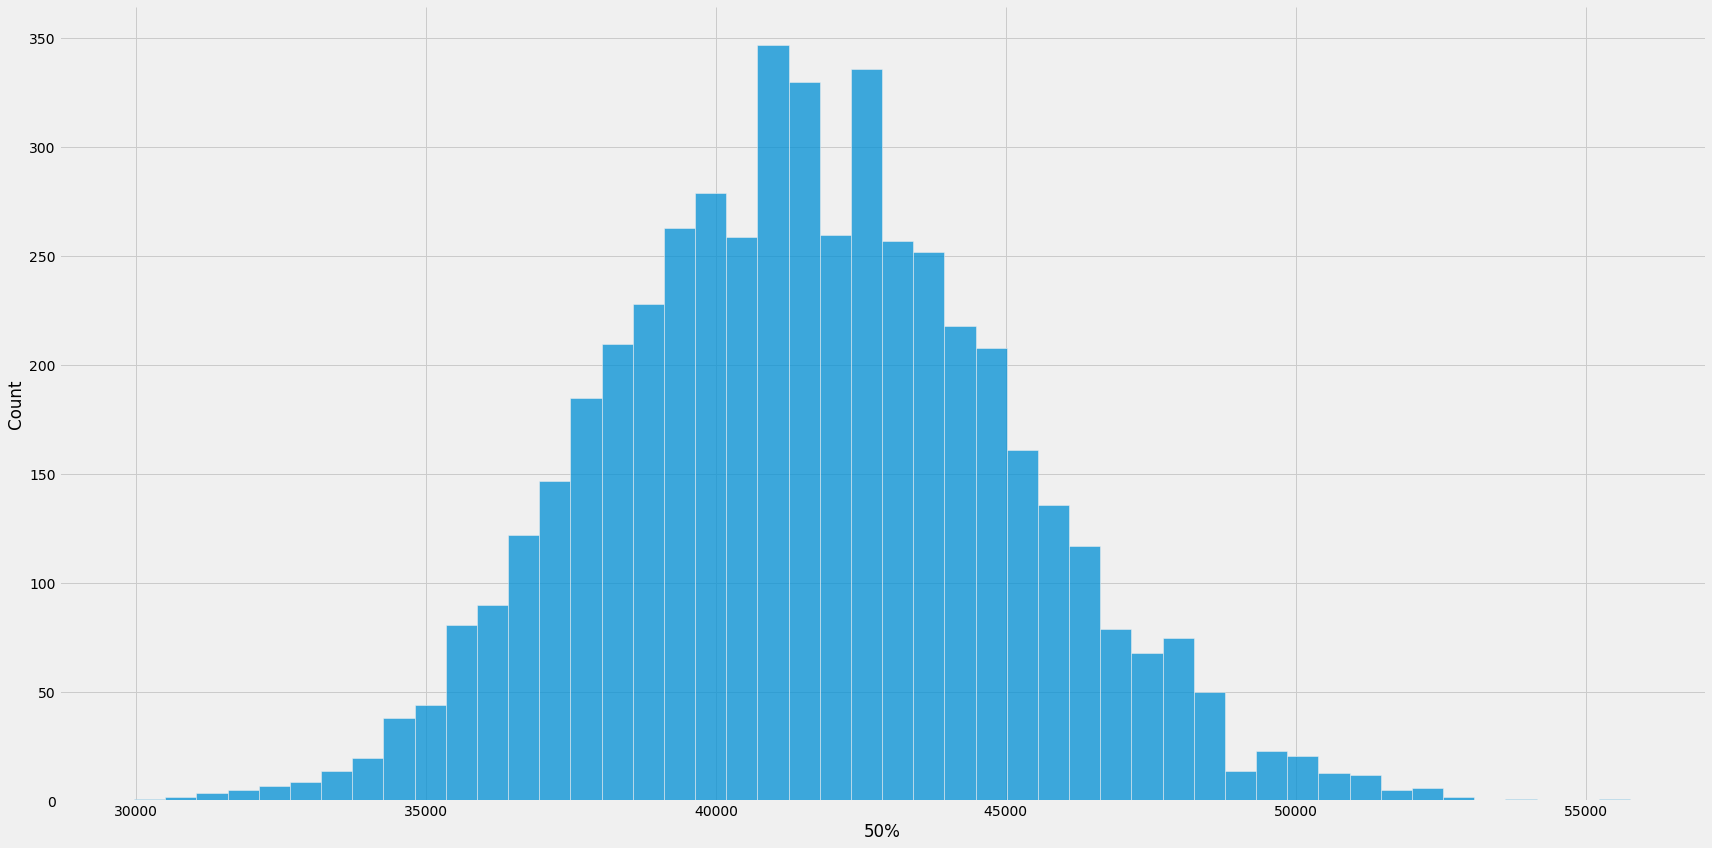

In [ ]:
sns.displot(x='50%', data = summary_stats_200, aspect = 2, height = 12);

## Task 1-3

Please repeat your repeated sampling in Task 1-2, but now you need to increase the sample size from 200 to 500 and 1000. Comment on the shape of the sampling distribution of the median monthly salary. When the sample size increases, is the sampling distribution of the median monthly salary approaching a normal distribution? (Please draw a panel of histograms to present your visualization).

**Solution**

In [ ]:
summary_stats_200 = posit_norm(5000,200)
summary_stats_200['size_samples'] = 200
summary_stats_500 = posit_norm(5000,500)
summary_stats_500['size_samples'] = 500
summary_stats_1000 = posit_norm(5000,1000)
summary_stats_1000['size_samples']=1000
summary_stats_tot = pd.concat([summary_stats_200,summary_stats_500,summary_stats_1000]).reset_index(drop=True)

In [ ]:
summary_stats_tot

,count,mean,std,min,25%,50%,75%,max,size_samples
0,200.0,55146.278250,51628.657696,0.0,20015.119737,41214.054486,75385.331340,265528.912767,200
1,200.0,50540.451622,47463.565679,0.0,17667.078500,41142.743317,65894.775917,267612.757362,200
2,200.0,53411.429643,47566.469073,0.0,18513.707151,41619.950498,79290.430762,213807.234419,200
3,200.0,52027.051890,48952.243397,0.0,17024.211699,41183.552019,76949.400642,301803.349905,200
4,200.0,57038.229261,50970.046218,0.0,21837.664843,46494.192906,78485.811404,291038.002510,200
...,...,...,...,...,...,...,...,...,...
14995,1000.0,51838.265175,53267.048670,0.0,17614.642879,40013.536790,72774.933883,814458.793521,1000
14996,1000.0,56707.796727,52563.842548,0.0,17852.065790,43505.270303,81665.426839,381671.879004,1000
14997,1000.0,53586.831146,51427.976740,0.0,17425.312711,41956.172889,74102.746430,326035.527944,1000
14998,1000.0,53198.924667,51746.704076,0.0,18300.594667,42232.207227,73553.331795,406993.546351,1000


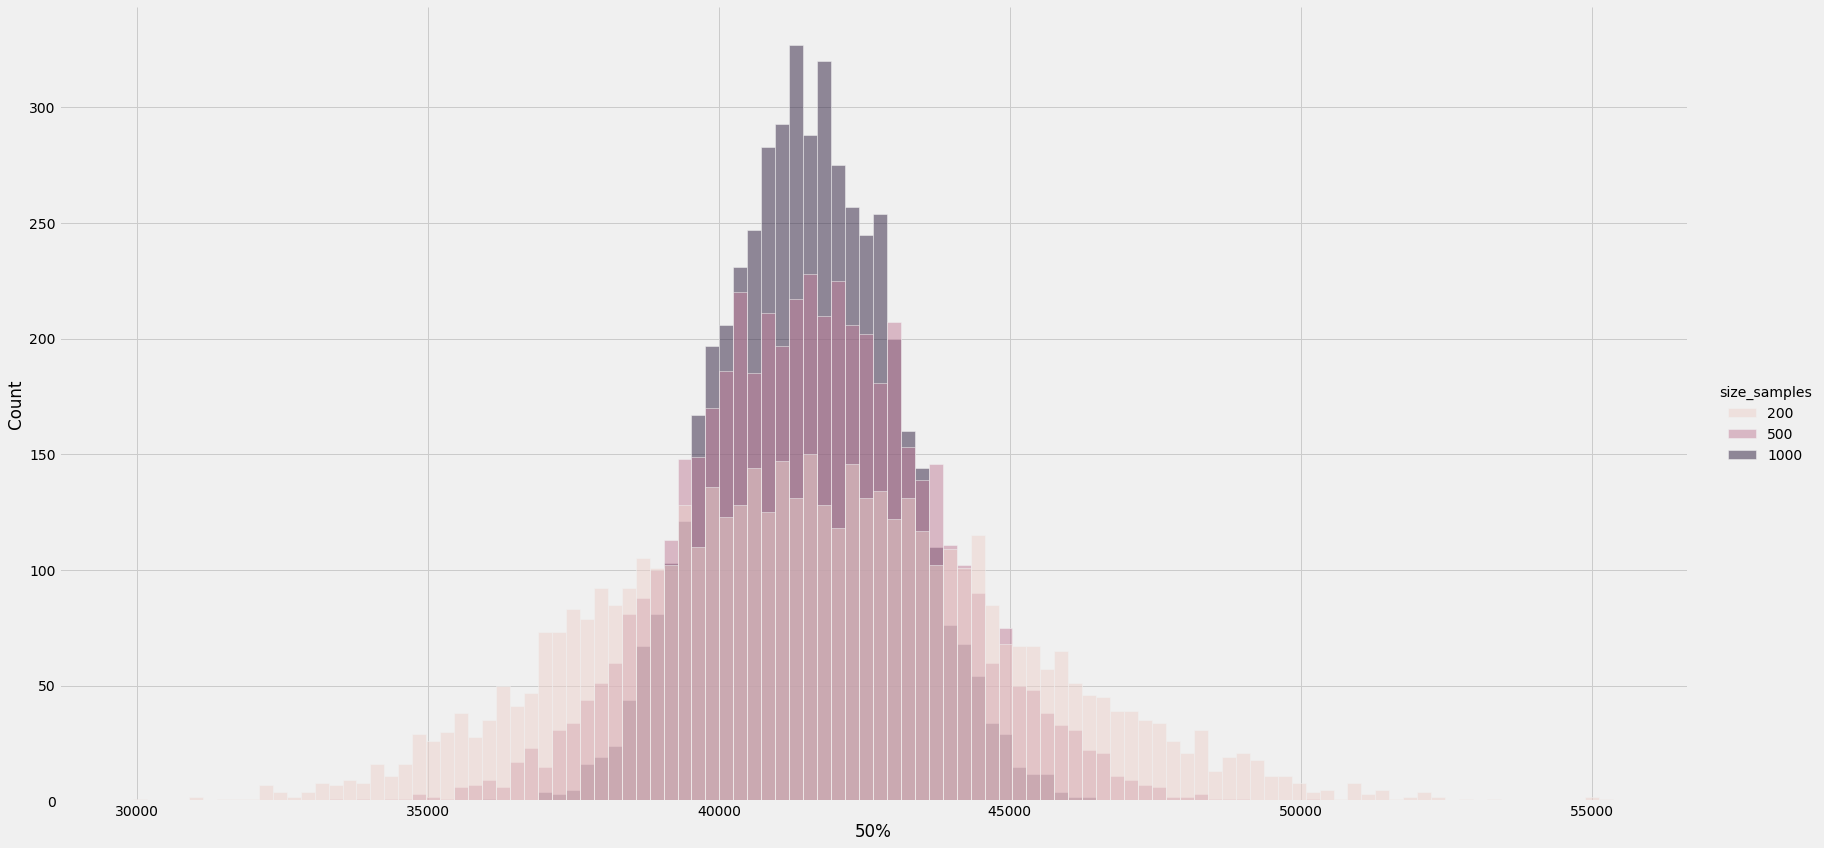

In [ ]:
sns.displot(x='50%', data = summary_stats_tot, hue = 'size_samples', aspect = 2, height = 12);


ANSWER: Here, we see a comparison of the 3 sample sizes, for 5,000 repeated sampling. This is seemingly in line with the idea behind Student's t-distrubution where by one estimates the mean of a normally distributed population with a small sample size. One can see, as the sample size gets larger, the distribution approaches a normal distribution. The t-distribution has heavier tails, meaning that it is more prone to producing values that fall far from its mean. We can see that the larger sample size makes the tails "less thick".

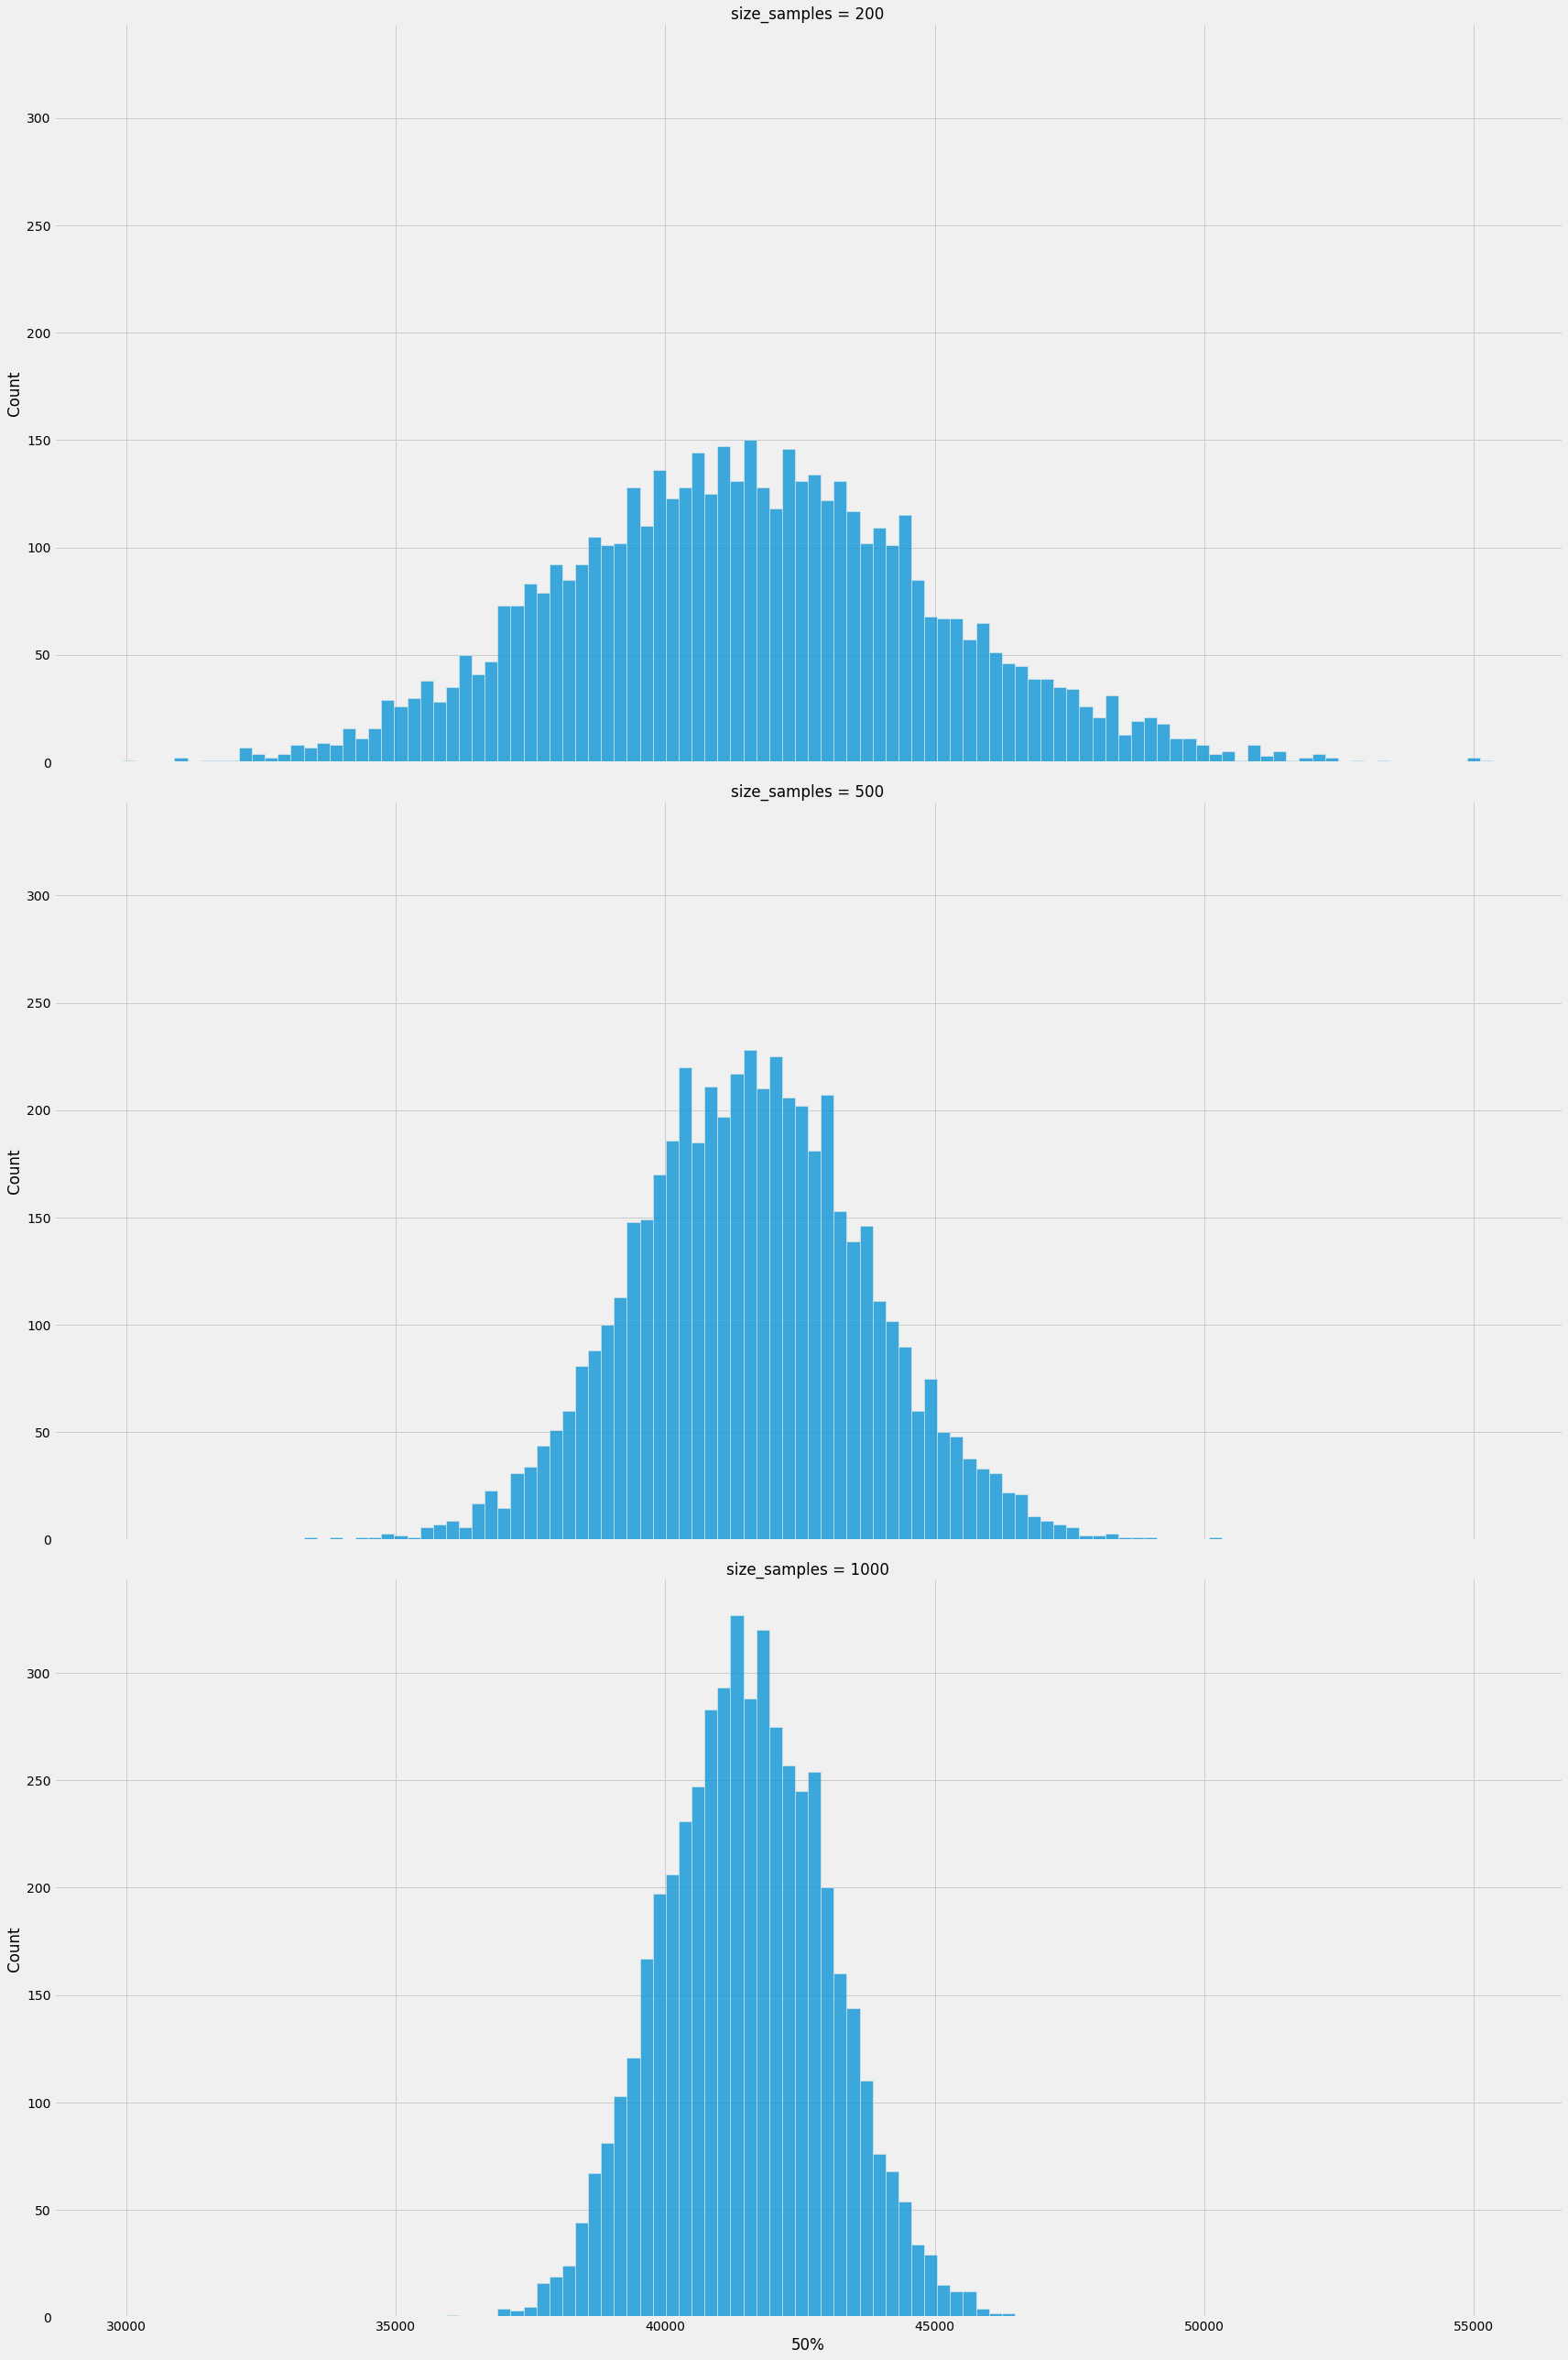

In [ ]:
#if you want a panel, then here you go:
sns.displot(x='50%', data = summary_stats_tot, row = 'size_samples', aspect = 2, height = 12);